In [1]:
%pip install supervision
%pip -q install roboflow
%pip -q install ultralytics==8.0.28


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.6/272.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.8/258.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')
dataset_location = "/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3"

Mounted at /content/drive


In [ ]:
import supervision as sv



In [ ]:
from ultralytics import YOLO
from PIL import Image
def predict_img(img_path, model_path):

  model = YOLO(model_path)
  source = img_path

  results = model(source)
  for r in results:
    try:
      return r.boxes.xywhn.cpu().numpy()[0]
    except Exception as e:
      return [0,0,0,0]

In [ ]:
def calcula_iou_numpy(predict, label):
    # caixa1 e caixa2 devem ser arrays NumPy no formato [x, y, largura, altura]
    x1, y1, w1, h1 = predict
    try:
      id2, x2, y2, w2, h2 = label
    except Exception as e:
      id2, x2, y2, w2, h2 = label[0]

    # Calcula as coordenadas dos cantos da interseção
    x_intersecao = max(x1, x2)
    y_intersecao = max(y1, y2)
    largura_intersecao = min(x1 + w1, x2 + w2) - x_intersecao
    altura_intersecao = min(y1 + h1, y2 + h2) - y_intersecao

    # Verifica se há interseção
    if largura_intersecao <= 0 or altura_intersecao <= 0:
        return 0.0

    # Calcula a área da interseção e da união
    area_intersecao = largura_intersecao * altura_intersecao
    area_uniao = w1 * h1 + w2 * h2 - area_intersecao

    # Calcula o IoU
    iou = area_intersecao / area_uniao

    return iou

In [ ]:
import os
import numpy as np
source = ['/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/test','/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train','/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid']
yolo_s = []
yolo_m = []
yolo_n = []
yolo_l = []
yolo_x = []


for filepath in source:
  for filename in os.listdir(f"{filepath}/labels"):
      labels = np.loadtxt(os.path.join(f"{filepath}/labels", filename))
      images = os.path.join(f"{filepath}/images", filename).split('.txt')[0] + '.jpg'
      print(images)

      predict_s = predict_img(images,'/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/trainyolov8s/weights/best.pt')
      print(predict_s)
      yolo_s.append(calcula_iou_numpy(predict_s, labels))
      with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/trainyolov8s/inferencias/{filename}", 'a') as file:
       file.write(str(predict_s))

      predict_m = predict_img(images,'/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train2yolov8m/weights/best.pt')
      yolo_m.append(calcula_iou_numpy(predict_m, labels))
      with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train2yolov8m/inferencias/{filename}", 'a') as file:
        file.write(str(predict_m))

      predict_n = predict_img(images,'/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train5yolov8n/weights/best.pt')
      yolo_n.append(calcula_iou_numpy(predict_n, labels))
      with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train5yolov8n/inferencias/{filename}", 'a') as file:
        file.write(str(predict_n))

      predict_l = predict_img(images,'/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train3yolov8L/weights/best.pt')
      yolo_l.append(calcula_iou_numpy(predict_l, labels))
      with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train3yolov8L/inferencias/{filename}", 'a') as file:
        file.write(str(predict_l))

      predict_x = predict_img(images,'/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train4yolov8X/weights/best.pt')
      yolo_x.append(calcula_iou_numpy(predict_x, labels))
      with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train4yolov8X/inferencias/{filename}", 'a') as file:
        file.write(str(predict_x))









with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train4yolov8X/iou.txt", 'w') as file:
        file.write(str(yolo_x))

with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train2yolov8m/iou.txt", 'w') as file:
        file.write(str(yolo_m))

with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train3yolov8L/iou.txt", 'w') as file:
        file.write(str(yolo_l))

with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train5yolov8n/iou.txt", 'w') as file:
        file.write(str(yolo_n))

with open(f"/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/trainyolov8s/iou.txt", 'w') as file:
        file.write(str(yolo_s))


[    0.68973     0.34598     0.27232     0.26339]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/73_jpg.rf.1f7308362b30913ff9b93168cdb7e331.jpg: 640x640 1 Tumor, 25.0ms
Speed: 0.5ms pre-process, 25.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/73_jpg.rf.1f7308362b30913ff9b93168cdb7e331.jpg: 640x640 1 Tumor, 16.9ms
Speed: 0.6ms pre-process, 16.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/73_jpg.rf.1f7

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0115_jpg.rf.7306db07d1940310c3f71354a47c05e6.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0115_jpg.rf.7306db07d1940310c3f71354a47c05e6.jpg: 640x640 16.6ms
Speed: 0.5ms pre-process, 16.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0115_jpg.rf.7306db07d1940310c3f71354a47c05e6.jpg: 640x640 1 Tumor, 19.9ms
Speed: 0.5ms pre-process, 19.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0115_jpg.rf.7306db07d1940310c3f71354a47c05e6.jpg: 640x640 1 Tumor, 15.7ms
Speed: 0.5ms pre-process, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/92_jpg.rf.16085751f6e31eedfb3554595d3a970e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/92_jpg.rf.16085751f6e31eedfb3554595d3a970e.jpg: 640x640 24.1ms
Speed: 0.5ms pre-process, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/92_jpg.rf.16085751f6e31eedfb3554595d3a970e.jpg: 640x640 1 Tumor, 21.3ms
Speed: 0.5ms pre-process, 21.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/92_jpg.rf.16085751f6e31eedfb3554595d3a970e.jpg: 640x640 1 Tumor, 16.9ms
Speed: 0.5ms pre-process, 16.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/92_jpg.rf.160

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/54_jpg.rf.6f0603e7aeab45f4e86c562807dda1d5.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/54_jpg.rf.6f0603e7aeab45f4e86c562807dda1d5.jpg: 640x640 1 Tumor, 23.0ms
Speed: 0.5ms pre-process, 23.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


[    0.57143     0.26116    0.089286     0.09375]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/54_jpg.rf.6f0603e7aeab45f4e86c562807dda1d5.jpg: 640x640 1 Tumor, 37.3ms
Speed: 0.5ms pre-process, 37.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/54_jpg.rf.6f0603e7aeab45f4e86c562807dda1d5.jpg: 640x640 1 Tumor, 17.0ms
Speed: 0.5ms pre-process, 17.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/76_jpg.rf.5b2c7226871174d34ba29d6459be0d62.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/76_jpg.rf.5b2c7226871174d34ba29d6459be0d62.jpg: 640x640 2 Tumors, 16.3ms
Speed: 0.5ms pre-process, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.48214     0.35045     0.41964     0.31696]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/76_jpg.rf.5b2c7226871174d34ba29d6459be0d62.jpg: 640x640 1 Tumor, 19.8ms
Speed: 0.5ms pre-process, 19.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/76_jpg.rf.5b2c7226871174d34ba29d6459be0d62.jpg: 640x640 1 Tumor, 17.2ms
Speed: 0.5ms pre-process, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/76_jpg.rf.5b2

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0107_jpg.rf.1a245930d18e91aa003d966f0bd83d55.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0107_jpg.rf.1a245930d18e91aa003d966f0bd83d55.jpg: 640x608 1 Tumor, 17.2ms
Speed: 0.6ms pre-process, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[     0.7243     0.74681      0.3271     0.26809]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0107_jpg.rf.1a245930d18e91aa003d966f0bd83d55.jpg: 640x608 1 Tumor, 21.4ms
Speed: 0.5ms pre-process, 21.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0107_jpg.rf.1a245930d18e91aa003d966f0bd83d55.jpg: 640x608 1 Tumor, 24.5ms
Speed: 0.5ms pre-process, 24.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0112_jpg.rf.49cbad22536f9dfb1dd88f14db623028.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0112_jpg.rf.49cbad22536f9dfb1dd88f14db623028.jpg: 640x608 1 Tumor, 20.1ms
Speed: 0.5ms pre-process, 20.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


[    0.59155     0.45551     0.20657     0.34322]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0112_jpg.rf.49cbad22536f9dfb1dd88f14db623028.jpg: 640x608 1 Tumor, 48.6ms
Speed: 0.5ms pre-process, 48.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0112_jpg.rf.49cbad22536f9dfb1dd88f14db623028.jpg: 640x608 1 Tumor, 17.8ms
Speed: 0.5ms pre-process, 17.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0135_jpg.rf.7a0f8ade76d461a7089c61172f9f4ebb.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0135_jpg.rf.7a0f8ade76d461a7089c61172f9f4ebb.jpg: 640x640 1 Tumor, 15.7ms
Speed: 0.5ms pre-process, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[     0.4668     0.65527     0.15234     0.16992]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0135_jpg.rf.7a0f8ade76d461a7089c61172f9f4ebb.jpg: 640x640 1 Tumor, 22.9ms
Speed: 0.5ms pre-process, 22.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0135_jpg.rf.7a0f8ade76d461a7089c61172f9f4ebb.jpg: 640x640 1 Tumor, 15.7ms
Speed: 0.5ms pre-process, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0134_jpg.rf.d625d4ac064c1072700a526d097eb104.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0134_jpg.rf.d625d4ac064c1072700a526d097eb104.jpg: 640x640 1 Tumor, 17.7ms
Speed: 0.5ms pre-process, 17.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.42773     0.66113    0.085938    0.091797]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0134_jpg.rf.d625d4ac064c1072700a526d097eb104.jpg: 640x640 1 Tumor, 20.1ms
Speed: 0.5ms pre-process, 20.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0134_jpg.rf.d625d4ac064c1072700a526d097eb104.jpg: 640x640 1 Tumor, 16.8ms
Speed: 0.5ms pre-process, 16.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0170_jpg.rf.5e97d6c97ad928fc8323b1366fefc1a9.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0170_jpg.rf.5e97d6c97ad928fc8323b1366fefc1a9.jpg: 640x640 1 Tumor, 16.2ms
Speed: 0.5ms pre-process, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[     0.6123     0.37598     0.12695    0.080078]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0170_jpg.rf.5e97d6c97ad928fc8323b1366fefc1a9.jpg: 640x640 1 Tumor, 26.0ms
Speed: 0.5ms pre-process, 26.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0170_jpg.rf.5e97d6c97ad928fc8323b1366fefc1a9.jpg: 640x640 1 Tumor, 15.7ms
Speed: 0.5ms pre-process, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0009_jpg.rf.08b6e36e832e69f7e670a752777fe1d4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0009_jpg.rf.08b6e36e832e69f7e670a752777fe1d4.jpg: 640x640 19.7ms
Speed: 0.5ms pre-process, 19.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0009_jpg.rf.08b6e36e832e69f7e670a752777fe1d4.jpg: 640x640 1 Tumor, 30.3ms
Speed: 0.5ms pre-process, 30.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0009_jpg.rf.08b6e36e832e69f7e670a752777fe1d4.jpg: 640x640 1 Tumor, 22.1ms
Speed: 0.5ms pre-process, 22.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradien

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0203_jpg.rf.184e89ef524860111faf7113b1982d38.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0203_jpg.rf.184e89ef524860111faf7113b1982d38.jpg: 640x640 17.4ms
Speed: 0.5ms pre-process, 17.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0203_jpg.rf.184e89ef524860111faf7113b1982d38.jpg: 640x640 20.9ms
Speed: 0.5ms pre-process, 20.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0203_jpg.rf.184e89ef524860111faf7113b1982d38.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/28_jpg.rf.44012075bcd74220824a17f3c13aa982.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/28_jpg.rf.44012075bcd74220824a17f3c13aa982.jpg: 640x640 1 Tumor, 22.8ms
Speed: 0.5ms pre-process, 22.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.71205     0.65402     0.20982     0.22768]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/28_jpg.rf.44012075bcd74220824a17f3c13aa982.jpg: 640x640 1 Tumor, 21.0ms
Speed: 0.6ms pre-process, 21.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/28_jpg.rf.44012075bcd74220824a17f3c13aa982.jpg: 640x640 1 Tumor, 16.2ms
Speed: 0.5ms pre-process, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/28_jpg.rf.440

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0200_jpg.rf.52d801a36ef4a30478d707ee875b4100.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0200_jpg.rf.52d801a36ef4a30478d707ee875b4100.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.5ms pre-process, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[     0.5293     0.31836     0.21875     0.23438]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0200_jpg.rf.52d801a36ef4a30478d707ee875b4100.jpg: 640x640 1 Tumor, 28.3ms
Speed: 0.6ms pre-process, 28.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0200_jpg.rf.52d801a36ef4a30478d707ee875b4100.jpg: 640x640 1 Tumor, 26.4ms
Speed: 0.5ms pre-process, 26.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0202_jpg.rf.514e7cc946bb91b7a38df5f8117ea0ff.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0202_jpg.rf.514e7cc946bb91b7a38df5f8117ea0ff.jpg: 640x640 1 Tumor, 16.3ms
Speed: 0.5ms pre-process, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.47266      0.4082    0.082031    0.085938]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0202_jpg.rf.514e7cc946bb91b7a38df5f8117ea0ff.jpg: 640x640 1 Tumor, 20.8ms
Speed: 0.5ms pre-process, 20.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0202_jpg.rf.514e7cc946bb91b7a38df5f8117ea0ff.jpg: 640x640 1 Tumor, 16.1ms
Speed: 0.5ms pre-process, 16.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0022_jpg.rf.f10d3096b027dedc0d90c0b44c2d9f4d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0022_jpg.rf.f10d3096b027dedc0d90c0b44c2d9f4d.jpg: 640x640 15.9ms
Speed: 0.5ms pre-process, 15.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0022_jpg.rf.f10d3096b027dedc0d90c0b44c2d9f4d.jpg: 640x640 1 Tumor, 20.9ms
Speed: 0.5ms pre-process, 20.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0022_jpg.rf.f10d3096b027dedc0d90c0b44c2d9f4d.jpg: 640x640 1 Tumor, 18.8ms
Speed: 0.5ms pre-process, 18.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0099_jpg.rf.2a0983dc7d64451b2d8ec523048584a0.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0099_jpg.rf.2a0983dc7d64451b2d8ec523048584a0.jpg: 640x576 1 Tumor, 16.9ms
Speed: 0.5ms pre-process, 16.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.29426     0.42739     0.29187     0.30705]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0099_jpg.rf.2a0983dc7d64451b2d8ec523048584a0.jpg: 640x576 1 Tumor, 28.5ms
Speed: 0.5ms pre-process, 28.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0099_jpg.rf.2a0983dc7d64451b2d8ec523048584a0.jpg: 640x576 1 Tumor, 17.3ms
Speed: 0.5ms pre-process, 17.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/29_jpg.rf.63e413f2188a8141f271c3ec9ff55d43.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/29_jpg.rf.63e413f2188a8141f271c3ec9ff55d43.jpg: 640x640 1 Tumor, 19.1ms
Speed: 0.5ms pre-process, 19.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.20089     0.45759     0.26786     0.20982]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/29_jpg.rf.63e413f2188a8141f271c3ec9ff55d43.jpg: 640x640 1 Tumor, 29.0ms
Speed: 0.6ms pre-process, 29.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/29_jpg.rf.63e413f2188a8141f271c3ec9ff55d43.jpg: 640x640 1 Tumor, 26.4ms
Speed: 0.6ms pre-process, 26.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/29_jpg.rf.63e

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0116_jpg.rf.3021e4073ef85cf42c27f9e539541abf.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0116_jpg.rf.3021e4073ef85cf42c27f9e539541abf.jpg: 640x640 1 Tumor, 16.3ms
Speed: 0.5ms pre-process, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.41504     0.35449     0.14258     0.11133]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0116_jpg.rf.3021e4073ef85cf42c27f9e539541abf.jpg: 640x640 1 Tumor, 25.0ms
Speed: 0.5ms pre-process, 25.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0116_jpg.rf.3021e4073ef85cf42c27f9e539541abf.jpg: 640x640 1 Tumor, 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0196_jpg.rf.f7cbcb4990722a37feff7e2ee401a46a.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0196_jpg.rf.f7cbcb4990722a37feff7e2ee401a46a.jpg: 640x640 1 Tumor, 17.3ms
Speed: 0.5ms pre-process, 17.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.46094     0.23242    0.082031    0.074219]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0196_jpg.rf.f7cbcb4990722a37feff7e2ee401a46a.jpg: 640x640 1 Tumor, 19.9ms
Speed: 0.5ms pre-process, 19.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0196_jpg.rf.f7cbcb4990722a37feff7e2ee401a46a.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0106_jpg.rf.115ee8aa17cd19c61702e6ceecd802f5.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0106_jpg.rf.115ee8aa17cd19c61702e6ceecd802f5.jpg: 640x544 1 Tumor, 16.2ms
Speed: 0.5ms pre-process, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.74378     0.50996     0.11443     0.13546]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0106_jpg.rf.115ee8aa17cd19c61702e6ceecd802f5.jpg: 640x544 1 Tumor, 24.9ms
Speed: 0.5ms pre-process, 24.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0106_jpg.rf.115ee8aa17cd19c61702e6ceecd802f5.jpg: 640x544 1 Tumor, 26.1ms
Speed: 0.7ms pre-process, 26.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0085_jpg.rf.caf54bab1189045e5c8629332b200e52.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0085_jpg.rf.caf54bab1189045e5c8629332b200e52.jpg: 576x640 1 Tumor, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.39706     0.73821     0.31513     0.28774]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0085_jpg.rf.caf54bab1189045e5c8629332b200e52.jpg: 576x640 1 Tumor, 20.8ms
Speed: 0.5ms pre-process, 20.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0085_jpg.rf.caf54bab1189045e5c8629332b200e52.jpg: 576x640 1 Tumor, 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/20_jpg.rf.ae3a8d838bf81015bc4753c4d302308f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/20_jpg.rf.ae3a8d838bf81015bc4753c4d302308f.jpg: 640x640 1 Tumor, 16.2ms
Speed: 0.5ms pre-process, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.34598     0.75223     0.18304     0.19196]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/20_jpg.rf.ae3a8d838bf81015bc4753c4d302308f.jpg: 640x640 1 Tumor, 21.2ms
Speed: 0.5ms pre-process, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/20_jpg.rf.ae3a8d838bf81015bc4753c4d302308f.jpg: 640x640 1 Tumor, 17.6ms
Speed: 0.5ms pre-process, 17.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/20_jpg.rf.ae3

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/18_jpg.rf.4002b0735aeb81fb34feb232a9cacf53.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/18_jpg.rf.4002b0735aeb81fb34feb232a9cacf53.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.5ms pre-process, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.66964     0.69866     0.30357     0.37054]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/18_jpg.rf.4002b0735aeb81fb34feb232a9cacf53.jpg: 640x640 1 Tumor, 23.1ms
Speed: 0.5ms pre-process, 23.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/18_jpg.rf.4002b0735aeb81fb34feb232a9cacf53.jpg: 640x640 1 Tumor, 15.9ms
Speed: 0.5ms pre-process, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/18_jpg.rf.400

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/53_jpg.rf.7eb12ba45662c08dd79cdb608d4970e7.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/53_jpg.rf.7eb12ba45662c08dd79cdb608d4970e7.jpg: 640x640 2 Tumors, 19.4ms
Speed: 0.5ms pre-process, 19.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.42188     0.50223     0.11161     0.12946]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/53_jpg.rf.7eb12ba45662c08dd79cdb608d4970e7.jpg: 640x640 1 Tumor, 24.6ms
Speed: 0.5ms pre-process, 24.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/53_jpg.rf.7eb12ba45662c08dd79cdb608d4970e7.jpg: 640x640 1 Tumor, 21.5ms
Speed: 0.6ms pre-process, 21.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/53_jpg.rf.7eb

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/39_jpg.rf.4bb2ff3ab6c00759658c74b36ebbf73a.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/39_jpg.rf.4bb2ff3ab6c00759658c74b36ebbf73a.jpg: 640x640 1 Tumor, 16.2ms
Speed: 0.5ms pre-process, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.66071     0.23214     0.20536     0.24107]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/39_jpg.rf.4bb2ff3ab6c00759658c74b36ebbf73a.jpg: 640x640 1 Tumor, 21.9ms
Speed: 0.5ms pre-process, 21.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/39_jpg.rf.4bb2ff3ab6c00759658c74b36ebbf73a.jpg: 640x640 1 Tumor, 15.6ms
Speed: 0.5ms pre-process, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/39_jpg.rf.4bb

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/62_jpg.rf.b368262f9c75b338d2227c6d8a0aa393.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/62_jpg.rf.b368262f9c75b338d2227c6d8a0aa393.jpg: 640x640 1 Tumor, 17.2ms
Speed: 0.5ms pre-process, 17.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.51339     0.34598     0.58929     0.42411]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/62_jpg.rf.b368262f9c75b338d2227c6d8a0aa393.jpg: 640x640 1 Tumor, 23.9ms
Speed: 0.5ms pre-process, 23.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/62_jpg.rf.b368262f9c75b338d2227c6d8a0aa393.jpg: 640x640 1 Tumor, 17.4ms
Speed: 0.5ms pre-process, 17.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/62_jpg.rf.b36

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0189_jpg.rf.a28b23fcc1df8b7b6a211e497a7ae0ad.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0189_jpg.rf.a28b23fcc1df8b7b6a211e497a7ae0ad.jpg: 640x640 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0189_jpg.rf.a28b23fcc1df8b7b6a211e497a7ae0ad.jpg: 640x640 33.5ms
Speed: 0.5ms pre-process, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0189_jpg.rf.a28b23fcc1df8b7b6a211e497a7ae0ad.jpg: 640x640 1 Tumor, 21.9ms
Speed: 0.5ms pre-process, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/46_jpg.rf.e85267dda55b51fcb4a850cf9cb50660.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/46_jpg.rf.e85267dda55b51fcb4a850cf9cb50660.jpg: 640x640 1 Tumor, 16.2ms
Speed: 0.5ms pre-process, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.24554     0.63393     0.14286     0.11607]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/46_jpg.rf.e85267dda55b51fcb4a850cf9cb50660.jpg: 640x640 1 Tumor, 20.9ms
Speed: 0.5ms pre-process, 20.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/46_jpg.rf.e85267dda55b51fcb4a850cf9cb50660.jpg: 640x640 1 Tumor, 15.7ms
Speed: 0.5ms pre-process, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/13_jpg.rf.7e62609dc7a9e55326f8d00001116182.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/13_jpg.rf.7e62609dc7a9e55326f8d00001116182.jpg: 640x640 1 Tumor, 15.5ms
Speed: 0.5ms pre-process, 15.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[     0.5625     0.14062     0.19643     0.22768]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/13_jpg.rf.7e62609dc7a9e55326f8d00001116182.jpg: 640x640 1 Tumor, 19.8ms
Speed: 0.5ms pre-process, 19.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/13_jpg.rf.7e62609dc7a9e55326f8d00001116182.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.5ms pre-process, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/13_jpg.rf.7e6

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0158_jpg.rf.789e236c7dddcd9a453d876522fb32a9.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0158_jpg.rf.789e236c7dddcd9a453d876522fb32a9.jpg: 640x640 20.0ms
Speed: 0.5ms pre-process, 20.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0158_jpg.rf.789e236c7dddcd9a453d876522fb32a9.jpg: 640x640 1 Tumor, 20.6ms
Speed: 0.5ms pre-process, 20.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0158_jpg.rf.789e236c7dddcd9a453d876522fb32a9.jpg: 640x640 1 Tumor, 16.7ms
Speed: 0.5ms pre-process, 16.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0193_jpg.rf.05934fef0591743016cd50440ff6df2d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0193_jpg.rf.05934fef0591743016cd50440ff6df2d.jpg: 640x640 19.5ms
Speed: 0.5ms pre-process, 19.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0193_jpg.rf.05934fef0591743016cd50440ff6df2d.jpg: 640x640 1 Tumor, 26.0ms
Speed: 0.5ms pre-process, 26.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0193_jpg.rf.05934fef0591743016cd50440ff6df2d.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/60_jpg.rf.85bb3c03016ecf0645daa2b9c0515bcd.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/60_jpg.rf.85bb3c03016ecf0645daa2b9c0515bcd.jpg: 640x640 1 Tumor, 15.6ms
Speed: 0.5ms pre-process, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.68527     0.21205     0.12946     0.12946]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/60_jpg.rf.85bb3c03016ecf0645daa2b9c0515bcd.jpg: 640x640 1 Tumor, 20.3ms
Speed: 0.5ms pre-process, 20.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/60_jpg.rf.85bb3c03016ecf0645daa2b9c0515bcd.jpg: 640x640 1 Tumor, 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/60_jpg.rf.85b

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/96_jpg.rf.2309156fcee79cf9df5df1d40491ffcf.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/96_jpg.rf.2309156fcee79cf9df5df1d40491ffcf.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.77679     0.50223     0.32143     0.24554]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/96_jpg.rf.2309156fcee79cf9df5df1d40491ffcf.jpg: 640x640 1 Tumor, 22.0ms
Speed: 0.7ms pre-process, 22.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/96_jpg.rf.2309156fcee79cf9df5df1d40491ffcf.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.5ms pre-process, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/96_jpg.rf.230

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/8_jpg.rf.9d85ed60b5b1fb90c981d60ac7c40718.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/8_jpg.rf.9d85ed60b5b1fb90c981d60ac7c40718.jpg: 640x640 1 Tumor, 18.9ms
Speed: 0.6ms pre-process, 18.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.29911     0.49107     0.36607     0.30357]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/8_jpg.rf.9d85ed60b5b1fb90c981d60ac7c40718.jpg: 640x640 1 Tumor, 28.5ms
Speed: 0.5ms pre-process, 28.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/8_jpg.rf.9d85ed60b5b1fb90c981d60ac7c40718.jpg: 640x640 1 Tumor, 17.2ms
Speed: 0.5ms pre-process, 17.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/8_jpg.rf.9d85ed

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/82_jpg.rf.93362fd6a2587a124e79ad0592127fc2.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/82_jpg.rf.93362fd6a2587a124e79ad0592127fc2.jpg: 640x640 1 Tumor, 15.6ms
Speed: 0.5ms pre-process, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.58929     0.29688     0.38393     0.37946]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/82_jpg.rf.93362fd6a2587a124e79ad0592127fc2.jpg: 640x640 1 Tumor, 21.9ms
Speed: 0.6ms pre-process, 21.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/82_jpg.rf.93362fd6a2587a124e79ad0592127fc2.jpg: 640x640 1 Tumor, 25.5ms
Speed: 0.6ms pre-process, 25.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/82_jpg.rf.933

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0218_jpg.rf.4cd2387f44bfd864bbbf2daddec44423.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0218_jpg.rf.4cd2387f44bfd864bbbf2daddec44423.jpg: 640x640 1 Tumor, 16.1ms
Speed: 0.5ms pre-process, 16.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.66797     0.39258     0.14062     0.19141]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0218_jpg.rf.4cd2387f44bfd864bbbf2daddec44423.jpg: 640x640 1 Tumor, 43.4ms
Speed: 0.5ms pre-process, 43.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0218_jpg.rf.4cd2387f44bfd864bbbf2daddec44423.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0011_jpg.rf.02df4a83269bf223e0bebe255879fd15.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0011_jpg.rf.02df4a83269bf223e0bebe255879fd15.jpg: 640x576 1 Tumor, 23.1ms
Speed: 0.5ms pre-process, 23.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[       0.69     0.39462         0.2     0.16143]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0011_jpg.rf.02df4a83269bf223e0bebe255879fd15.jpg: 640x576 29.0ms
Speed: 0.5ms pre-process, 29.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0011_jpg.rf.02df4a83269bf223e0bebe255879fd15.jpg: 640x576 16.8ms
Speed: 0.5ms pre-process, 16.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0011_jpg.

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/25_jpg.rf.ee501f15cc5313eb9659302dfd9c286d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/25_jpg.rf.ee501f15cc5313eb9659302dfd9c286d.jpg: 640x640 1 Tumor, 18.6ms
Speed: 0.5ms pre-process, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.67188     0.60938     0.13839     0.17411]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/25_jpg.rf.ee501f15cc5313eb9659302dfd9c286d.jpg: 640x640 1 Tumor, 26.1ms
Speed: 0.5ms pre-process, 26.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/25_jpg.rf.ee501f15cc5313eb9659302dfd9c286d.jpg: 640x640 1 Tumor, 21.9ms
Speed: 0.5ms pre-process, 21.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/25_jpg.rf.ee5

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0082_jpg.rf.5eba5cb16ca22e1d857fbec010349019.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0082_jpg.rf.5eba5cb16ca22e1d857fbec010349019.jpg: 640x512 1 Tumor, 17.8ms
Speed: 0.5ms pre-process, 17.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[     0.6775     0.44444       0.255     0.26984]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0082_jpg.rf.5eba5cb16ca22e1d857fbec010349019.jpg: 640x512 1 Tumor, 26.6ms
Speed: 0.4ms pre-process, 26.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0082_jpg.rf.5eba5cb16ca22e1d857fbec010349019.jpg: 640x512 1 Tumor, 16.8ms
Speed: 0.5ms pre-process, 16.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/59_jpg.rf.14ed99c451b858854ae18c27bd11ef12.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/59_jpg.rf.14ed99c451b858854ae18c27bd11ef12.jpg: 640x640 1 Tumor, 15.7ms
Speed: 0.5ms pre-process, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[     0.7567     0.50446     0.14732     0.22321]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/59_jpg.rf.14ed99c451b858854ae18c27bd11ef12.jpg: 640x640 1 Tumor, 20.1ms
Speed: 0.5ms pre-process, 20.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/59_jpg.rf.14ed99c451b858854ae18c27bd11ef12.jpg: 640x640 1 Tumor, 16.2ms
Speed: 0.5ms pre-process, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/59_jpg.rf.14e

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/86_jpg.rf.66026f2e2eb9e6fd84073e0eabb927df.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/86_jpg.rf.66026f2e2eb9e6fd84073e0eabb927df.jpg: 640x640 1 Tumor, 17.7ms
Speed: 0.5ms pre-process, 17.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.69196     0.32143     0.35714     0.36607]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/86_jpg.rf.66026f2e2eb9e6fd84073e0eabb927df.jpg: 640x640 2 Tumors, 34.4ms
Speed: 0.5ms pre-process, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/86_jpg.rf.66026f2e2eb9e6fd84073e0eabb927df.jpg: 640x640 1 Tumor, 20.9ms
Speed: 0.5ms pre-process, 20.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/86_jpg.rf.66

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/5_jpg.rf.e9ca89ae1a7bfa88d37c11fb191ab198.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/5_jpg.rf.e9ca89ae1a7bfa88d37c11fb191ab198.jpg: 640x640 1 Tumor, 17.3ms
Speed: 0.5ms pre-process, 17.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.42857      0.4375     0.21429     0.25893]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/5_jpg.rf.e9ca89ae1a7bfa88d37c11fb191ab198.jpg: 640x640 1 Tumor, 24.1ms
Speed: 0.5ms pre-process, 24.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/5_jpg.rf.e9ca89ae1a7bfa88d37c11fb191ab198.jpg: 640x640 1 Tumor, 27.2ms
Speed: 1.2ms pre-process, 27.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/5_jpg.rf.e9ca89

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0146_jpg.rf.e2bdfae39a6ede75edb0da1598099297.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0146_jpg.rf.e2bdfae39a6ede75edb0da1598099297.jpg: 640x640 15.7ms
Speed: 0.5ms pre-process, 15.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0146_jpg.rf.e2bdfae39a6ede75edb0da1598099297.jpg: 640x640 1 Tumor, 45.8ms
Speed: 1.3ms pre-process, 45.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0146_jpg.rf.e2bdfae39a6ede75edb0da1598099297.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/44_jpg.rf.0b6f99ddc8db9bfe89a739b184b55a50.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/44_jpg.rf.0b6f99ddc8db9bfe89a739b184b55a50.jpg: 640x640 1 Tumor, 17.9ms
Speed: 0.6ms pre-process, 17.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.28571     0.69866     0.17857     0.18304]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/44_jpg.rf.0b6f99ddc8db9bfe89a739b184b55a50.jpg: 640x640 1 Tumor, 29.0ms
Speed: 0.5ms pre-process, 29.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/44_jpg.rf.0b6f99ddc8db9bfe89a739b184b55a50.jpg: 640x640 1 Tumor, 17.9ms
Speed: 0.5ms pre-process, 17.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/44_jpg.rf.0b6

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0191_jpg.rf.8b947af8e998ed37507faaa71f6926be.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0191_jpg.rf.8b947af8e998ed37507faaa71f6926be.jpg: 640x640 1 Tumor, 17.3ms
Speed: 0.5ms pre-process, 17.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.28906     0.37695     0.10547     0.10938]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0191_jpg.rf.8b947af8e998ed37507faaa71f6926be.jpg: 640x640 1 Tumor, 27.6ms
Speed: 0.5ms pre-process, 27.6ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0191_jpg.rf.8b947af8e998ed37507faaa71f6926be.jpg: 640x640 1 Tumor, 16.2ms
Speed: 0.5ms pre-process, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0003_jpg.rf.bd4ef8808a87c26273c5dc3492d00979.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0003_jpg.rf.bd4ef8808a87c26273c5dc3492d00979.jpg: 640x576 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0003_jpg.rf.bd4ef8808a87c26273c5dc3492d00979.jpg: 640x576 1 Tumor, 21.5ms
Speed: 0.5ms pre-process, 21.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0003_jpg.rf.bd4ef8808a87c26273c5dc3492d00979.jpg: 640x576 1 Tumor, 20.4ms
Speed: 0.5ms pre-process, 20.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0050_jpg.rf.115617660a6b74a0cb90c8c3dadc5082.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0050_jpg.rf.115617660a6b74a0cb90c8c3dadc5082.jpg: 640x640 1 Tumor, 16.6ms
Speed: 0.6ms pre-process, 16.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.45588     0.17195     0.16063     0.12217]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0050_jpg.rf.115617660a6b74a0cb90c8c3dadc5082.jpg: 640x640 1 Tumor, 21.1ms
Speed: 0.5ms pre-process, 21.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0050_jpg.rf.115617660a6b74a0cb90c8c3dadc5082.jpg: 640x640 1 Tumor, 18.5ms
Speed: 0.5ms pre-process, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0035_jpg.rf.c9b96871df456f83e87c4551566fbe1b.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0035_jpg.rf.c9b96871df456f83e87c4551566fbe1b.jpg: 640x480 1 Tumor, 16.9ms
Speed: 0.5ms pre-process, 16.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


[    0.69167      0.4551        0.35     0.29369]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0035_jpg.rf.c9b96871df456f83e87c4551566fbe1b.jpg: 640x480 1 Tumor, 23.1ms
Speed: 0.5ms pre-process, 23.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0035_jpg.rf.c9b96871df456f83e87c4551566fbe1b.jpg: 640x480 1 Tumor, 22.2ms
Speed: 0.5ms pre-process, 22.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/41_jpg.rf.17defa9338dc3ff01c177229676ec733.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/41_jpg.rf.17defa9338dc3ff01c177229676ec733.jpg: 640x640 1 Tumor, 16.3ms
Speed: 0.5ms pre-process, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.33036     0.43304        0.25     0.24107]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/41_jpg.rf.17defa9338dc3ff01c177229676ec733.jpg: 640x640 1 Tumor, 21.4ms
Speed: 0.5ms pre-process, 21.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/41_jpg.rf.17defa9338dc3ff01c177229676ec733.jpg: 640x640 1 Tumor, 18.0ms
Speed: 0.6ms pre-process, 18.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/41_jpg.rf.17d

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0096_jpg.rf.f7c692c1441f3ab58ecc6ba9aea8230c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0096_jpg.rf.f7c692c1441f3ab58ecc6ba9aea8230c.jpg: 640x640 1 Tumor, 16.3ms
Speed: 0.5ms pre-process, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.32812     0.67123     0.28125     0.30137]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0096_jpg.rf.f7c692c1441f3ab58ecc6ba9aea8230c.jpg: 640x640 1 Tumor, 24.1ms
Speed: 0.5ms pre-process, 24.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0096_jpg.rf.f7c692c1441f3ab58ecc6ba9aea8230c.jpg: 640x640 1 Tumor, 23.9ms
Speed: 0.8ms pre-process, 23.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0232_jpg.rf.9800a267f80746b6af2182320a400ea4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0232_jpg.rf.9800a267f80746b6af2182320a400ea4.jpg: 640x640 1 Tumor, 32.6ms
Speed: 0.6ms pre-process, 32.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.31348      0.6123     0.13867     0.18555]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0232_jpg.rf.9800a267f80746b6af2182320a400ea4.jpg: 640x640 1 Tumor, 29.7ms
Speed: 0.6ms pre-process, 29.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0232_jpg.rf.9800a267f80746b6af2182320a400ea4.jpg: 640x640 1 Tumor, 23.9ms
Speed: 0.6ms pre-process, 23.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0077_jpg.rf.f7226b7b3e14c5822852d31de2a3b443.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0077_jpg.rf.f7226b7b3e14c5822852d31de2a3b443.jpg: 640x608 1 Tumor, 27.4ms
Speed: 0.6ms pre-process, 27.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[     0.5377     0.19436     0.28852     0.24629]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0077_jpg.rf.f7226b7b3e14c5822852d31de2a3b443.jpg: 640x608 1 Tumor, 28.7ms
Speed: 0.6ms pre-process, 28.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0077_jpg.rf.f7226b7b3e14c5822852d31de2a3b443.jpg: 640x608 1 Tumor, 15.9ms
Speed: 0.5ms pre-process, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0040_jpg.rf.16561a0502529b1baf739be13cf61e14.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0040_jpg.rf.16561a0502529b1baf739be13cf61e14.jpg: 640x608 1 Tumor, 25.6ms
Speed: 0.6ms pre-process, 25.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.70743     0.44737     0.20124     0.25146]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0040_jpg.rf.16561a0502529b1baf739be13cf61e14.jpg: 640x608 1 Tumor, 21.0ms
Speed: 0.5ms pre-process, 21.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0040_jpg.rf.16561a0502529b1baf739be13cf61e14.jpg: 640x608 1 Tumor, 16.9ms
Speed: 0.5ms pre-process, 16.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0301_jpg.rf.94e58926fec706ff1becd7c3fec4b600.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0301_jpg.rf.94e58926fec706ff1becd7c3fec4b600.jpg: 640x640 1 Tumor, 17.1ms
Speed: 0.6ms pre-process, 17.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.35938     0.40527     0.19531     0.19336]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0301_jpg.rf.94e58926fec706ff1becd7c3fec4b600.jpg: 640x640 1 Tumor, 20.5ms
Speed: 0.5ms pre-process, 20.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0301_jpg.rf.94e58926fec706ff1becd7c3fec4b600.jpg: 640x640 1 Tumor, 16.1ms
Speed: 0.5ms pre-process, 16.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0001_jpg.rf.4686dacc99f003ae25606b30d9eb5349.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0001_jpg.rf.4686dacc99f003ae25606b30d9eb5349.jpg: 640x544 3 Tumors, 16.7ms
Speed: 0.5ms pre-process, 16.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.73152     0.61238     0.23346     0.29967]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0001_jpg.rf.4686dacc99f003ae25606b30d9eb5349.jpg: 640x544 1 Tumor, 25.1ms
Speed: 0.5ms pre-process, 25.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-meTr_0001_jpg.rf.4686dacc99f003ae25606b30d9eb5349.jpg: 640x544 1 Tumor, 19.0ms
Speed: 0.5ms pre-process, 19.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0029_jpg.rf.ebf54f773686911df9c7b198bad8573d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0029_jpg.rf.ebf54f773686911df9c7b198bad8573d.jpg: 640x608 1 Tumor, 16.8ms
Speed: 0.5ms pre-process, 16.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.46043     0.71078     0.27338     0.22549]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0029_jpg.rf.ebf54f773686911df9c7b198bad8573d.jpg: 640x608 1 Tumor, 21.0ms
Speed: 0.5ms pre-process, 21.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0029_jpg.rf.ebf54f773686911df9c7b198bad8573d.jpg: 640x608 1 Tumor, 16.1ms
Speed: 0.5ms pre-process, 16.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0062_jpg.rf.18c44b1316ea847c5a97abbe781781d3.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0062_jpg.rf.18c44b1316ea847c5a97abbe781781d3.jpg: 640x640 1 Tumor, 16.2ms
Speed: 0.5ms pre-process, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.23148     0.57639     0.14815     0.20833]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0062_jpg.rf.18c44b1316ea847c5a97abbe781781d3.jpg: 640x640 1 Tumor, 20.2ms
Speed: 0.5ms pre-process, 20.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0062_jpg.rf.18c44b1316ea847c5a97abbe781781d3.jpg: 640x640 1 Tumor, 24.7ms
Speed: 0.5ms pre-process, 24.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0186_jpg.rf.7a8040c8b793b66a28f34d4bfaa9b0e3.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0186_jpg.rf.7a8040c8b793b66a28f34d4bfaa9b0e3.jpg: 640x640 1 Tumor, 16.1ms
Speed: 0.5ms pre-process, 16.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.45801     0.30176    0.091797    0.076172]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0186_jpg.rf.7a8040c8b793b66a28f34d4bfaa9b0e3.jpg: 640x640 1 Tumor, 22.9ms
Speed: 0.5ms pre-process, 22.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0186_jpg.rf.7a8040c8b793b66a28f34d4bfaa9b0e3.jpg: 640x640 1 Tumor, 15.9ms
Speed: 0.5ms pre-process, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0208_jpg.rf.6625c6b0aafa77c4a00a872f9292b939.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0208_jpg.rf.6625c6b0aafa77c4a00a872f9292b939.jpg: 640x640 1 Tumor, 22.8ms
Speed: 0.5ms pre-process, 22.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.55664     0.23926     0.10156    0.087891]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0208_jpg.rf.6625c6b0aafa77c4a00a872f9292b939.jpg: 640x640 1 Tumor, 30.7ms
Speed: 0.6ms pre-process, 30.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0208_jpg.rf.6625c6b0aafa77c4a00a872f9292b939.jpg: 640x640 1 Tumor, 30.1ms
Speed: 0.6ms pre-process, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0086_jpg.rf.27311bf7e446b7a9de4420f885514f04.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0086_jpg.rf.27311bf7e446b7a9de4420f885514f04.jpg: 640x640 2 Tumors, 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.66667     0.57111     0.25778     0.22667]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0086_jpg.rf.27311bf7e446b7a9de4420f885514f04.jpg: 640x640 1 Tumor, 20.2ms
Speed: 0.5ms pre-process, 20.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0086_jpg.rf.27311bf7e446b7a9de4420f885514f04.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.5ms pre-process, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0169_jpg.rf.a808b2cd45678470b455145125acec55.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0169_jpg.rf.a808b2cd45678470b455145125acec55.jpg: 640x640 1 Tumor, 16.6ms
Speed: 0.5ms pre-process, 16.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.29199     0.40332     0.13867     0.20117]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0169_jpg.rf.a808b2cd45678470b455145125acec55.jpg: 640x640 1 Tumor, 19.9ms
Speed: 0.5ms pre-process, 19.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0169_jpg.rf.a808b2cd45678470b455145125acec55.jpg: 640x640 1 Tumor, 24.6ms
Speed: 0.5ms pre-process, 24.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/26_jpg.rf.6dcd395d6fcaece08100a68e908de896.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/26_jpg.rf.6dcd395d6fcaece08100a68e908de896.jpg: 640x640 1 Tumor, 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.40402     0.39732     0.16518     0.20536]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/26_jpg.rf.6dcd395d6fcaece08100a68e908de896.jpg: 640x640 1 Tumor, 31.1ms
Speed: 0.5ms pre-process, 31.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/26_jpg.rf.6dcd395d6fcaece08100a68e908de896.jpg: 640x640 1 Tumor, 19.3ms
Speed: 0.5ms pre-process, 19.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0059_jpg.rf.451ee56007f1baaa44fb456a8d6bd648.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0059_jpg.rf.451ee56007f1baaa44fb456a8d6bd648.jpg: 416x640 1 Tumor, 16.2ms
Speed: 0.4ms pre-process, 16.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.66401     0.43846     0.23248     0.34359]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0059_jpg.rf.451ee56007f1baaa44fb456a8d6bd648.jpg: 416x640 1 Tumor, 20.8ms
Speed: 0.4ms pre-process, 20.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0059_jpg.rf.451ee56007f1baaa44fb456a8d6bd648.jpg: 416x640 1 Tumor, 24.0ms
Speed: 0.5ms pre-process, 24.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/36_jpg.rf.f41592a43d7fabc6075f68c7c6337ed7.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/36_jpg.rf.f41592a43d7fabc6075f68c7c6337ed7.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.31696     0.75446     0.19643        0.25]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/36_jpg.rf.f41592a43d7fabc6075f68c7c6337ed7.jpg: 640x640 1 Tumor, 29.4ms
Speed: 0.5ms pre-process, 29.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/36_jpg.rf.f41592a43d7fabc6075f68c7c6337ed7.jpg: 640x640 1 Tumor, 16.0ms
Speed: 0.5ms pre-process, 16.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/36_jpg.rf.f41

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0016_jpg.rf.076c2cf985525adbd80abb5da8f5cb84.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0016_jpg.rf.076c2cf985525adbd80abb5da8f5cb84.jpg: 640x576 1 Tumor, 19.4ms
Speed: 0.6ms pre-process, 19.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.76724     0.43953     0.19655     0.28319]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0016_jpg.rf.076c2cf985525adbd80abb5da8f5cb84.jpg: 640x576 1 Tumor, 30.2ms
Speed: 0.5ms pre-process, 30.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0016_jpg.rf.076c2cf985525adbd80abb5da8f5cb84.jpg: 640x576 1 Tumor, 16.9ms
Speed: 0.5ms pre-process, 16.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0036_jpg.rf.4bbac80683a6ee20e7614254e96bafcb.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0036_jpg.rf.4bbac80683a6ee20e7614254e96bafcb.jpg: 640x544 1 Tumor, 70.6ms
Speed: 0.5ms pre-process, 70.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


[    0.34146     0.36853     0.44878     0.52988]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0036_jpg.rf.4bbac80683a6ee20e7614254e96bafcb.jpg: 640x544 1 Tumor, 27.1ms
Speed: 0.6ms pre-process, 27.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0036_jpg.rf.4bbac80683a6ee20e7614254e96bafcb.jpg: 640x544 1 Tumor, 19.9ms
Speed: 0.6ms pre-process, 19.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/42_jpg.rf.5cb629c683cc6e93575fda8eefd6e750.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/42_jpg.rf.5cb629c683cc6e93575fda8eefd6e750.jpg: 640x640 2 Tumors, 16.6ms
Speed: 0.6ms pre-process, 16.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.67411     0.27902     0.22321     0.20982]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/42_jpg.rf.5cb629c683cc6e93575fda8eefd6e750.jpg: 640x640 2 Tumors, 27.3ms
Speed: 0.5ms pre-process, 27.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/42_jpg.rf.5cb629c683cc6e93575fda8eefd6e750.jpg: 640x640 1 Tumor, 15.6ms
Speed: 0.5ms pre-process, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/42_jpg.rf.5c

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0177_jpg.rf.4e0c5d6ace81673738941119a7be2745.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0177_jpg.rf.4e0c5d6ace81673738941119a7be2745.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.31738     0.37793     0.16211     0.16992]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0177_jpg.rf.4e0c5d6ace81673738941119a7be2745.jpg: 640x640 1 Tumor, 24.8ms
Speed: 0.5ms pre-process, 24.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0177_jpg.rf.4e0c5d6ace81673738941119a7be2745.jpg: 640x640 2 Tumors, 16.2ms
Speed: 0.5ms pre-process, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/ima

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0025_jpg.rf.645b98588959c5b9d35c0c8cebb9b68d.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0025_jpg.rf.645b98588959c5b9d35c0c8cebb9b68d.jpg: 640x576 1 Tumor, 18.7ms
Speed: 0.5ms pre-process, 18.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.25943     0.38842     0.37421     0.34746]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0025_jpg.rf.645b98588959c5b9d35c0c8cebb9b68d.jpg: 640x576 1 Tumor, 29.4ms
Speed: 0.5ms pre-process, 29.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0025_jpg.rf.645b98588959c5b9d35c0c8cebb9b68d.jpg: 640x576 1 Tumor, 20.5ms
Speed: 0.5ms pre-process, 20.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0074_jpg.rf.74e274aa2d16debeb4a8891ed7245d6c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0074_jpg.rf.74e274aa2d16debeb4a8891ed7245d6c.jpg: 640x544 2 Tumors, 19.5ms
Speed: 0.5ms pre-process, 19.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.34066     0.68865     0.29304     0.32209]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0074_jpg.rf.74e274aa2d16debeb4a8891ed7245d6c.jpg: 640x544 2 Tumors, 22.3ms
Speed: 0.5ms pre-process, 22.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0074_jpg.rf.74e274aa2d16debeb4a8891ed7245d6c.jpg: 640x544 2 Tumors, 16.7ms
Speed: 0.5ms pre-process, 16.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0149_jpg.rf.5e6d50a1374a2be550ec99f70055f424.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0149_jpg.rf.5e6d50a1374a2be550ec99f70055f424.jpg: 640x640 1 Tumor, 16.1ms
Speed: 0.5ms pre-process, 16.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.44922     0.40332     0.11719     0.13477]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0149_jpg.rf.5e6d50a1374a2be550ec99f70055f424.jpg: 640x640 1 Tumor, 22.0ms
Speed: 0.5ms pre-process, 22.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/Te-me_0149_jpg.rf.5e6d50a1374a2be550ec99f70055f424.jpg: 640x640 1 Tumor, 17.9ms
Speed: 0.5ms pre-process, 17.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/14_jpg.rf.4596d080e4ac660fadd81a59c11b147b.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/14_jpg.rf.4596d080e4ac660fadd81a59c11b147b.jpg: 640x640 1 Tumor, 16.3ms
Speed: 0.5ms pre-process, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.30357     0.63393     0.39286         0.5]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/14_jpg.rf.4596d080e4ac660fadd81a59c11b147b.jpg: 640x640 1 Tumor, 20.5ms
Speed: 0.5ms pre-process, 20.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/14_jpg.rf.4596d080e4ac660fadd81a59c11b147b.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/14_jpg.rf.459

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/75_jpg.rf.3aa69dbf432af785d44ee05a19054f34.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/75_jpg.rf.3aa69dbf432af785d44ee05a19054f34.jpg: 640x640 1 Tumor, 18.4ms
Speed: 0.5ms pre-process, 18.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


[    0.52232     0.59152     0.10714     0.11161]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/75_jpg.rf.3aa69dbf432af785d44ee05a19054f34.jpg: 640x640 2 Tumors, 64.8ms
Speed: 0.5ms pre-process, 64.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/75_jpg.rf.3aa69dbf432af785d44ee05a19054f34.jpg: 640x640 2 Tumors, 19.6ms
Speed: 0.6ms pre-process, 19.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs



/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/32_jpg.rf.203c0436d70c05e10050a14b74e52f86.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/32_jpg.rf.203c0436d70c05e10050a14b74e52f86.jpg: 640x640 1 Tumor, 22.8ms
Speed: 0.5ms pre-process, 22.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.73214     0.53348     0.14286     0.09375]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/32_jpg.rf.203c0436d70c05e10050a14b74e52f86.jpg: 640x640 1 Tumor, 22.6ms
Speed: 0.5ms pre-process, 22.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/32_jpg.rf.203c0436d70c05e10050a14b74e52f86.jpg: 640x640 1 Tumor, 16.3ms
Speed: 0.5ms pre-process, 16.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train/images/32_jpg.rf.203

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/69_jpg.rf.23bb87992feebdcf0d372df4ab2451d4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/69_jpg.rf.23bb87992feebdcf0d372df4ab2451d4.jpg: 640x640 15.9ms
Speed: 0.5ms pre-process, 15.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/69_jpg.rf.23bb87992feebdcf0d372df4ab2451d4.jpg: 640x640 1 Tumor, 31.8ms
Speed: 0.6ms pre-process, 31.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/69_jpg.rf.23bb87992feebdcf0d372df4ab2451d4.jpg: 640x640 1 Tumor, 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/69_jpg.rf.23b

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/38_jpg.rf.aecd1268ceeed36858839a8b6eaabe2f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/38_jpg.rf.aecd1268ceeed36858839a8b6eaabe2f.jpg: 640x640 1 Tumor, 16.8ms
Speed: 0.6ms pre-process, 16.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.33705     0.37277     0.45089     0.52232]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/38_jpg.rf.aecd1268ceeed36858839a8b6eaabe2f.jpg: 640x640 1 Tumor, 22.5ms
Speed: 0.5ms pre-process, 22.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/38_jpg.rf.aecd1268ceeed36858839a8b6eaabe2f.jpg: 640x640 1 Tumor, 21.6ms
Speed: 0.5ms pre-process, 21.6ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0013_jpg.rf.c46e50d2f180ef768aae880f771b2770.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0013_jpg.rf.c46e50d2f180ef768aae880f771b2770.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.32766     0.67799     0.28345     0.30211]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0013_jpg.rf.c46e50d2f180ef768aae880f771b2770.jpg: 640x640 1 Tumor, 21.2ms
Speed: 0.5ms pre-process, 21.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0013_jpg.rf.c46e50d2f180ef768aae880f771b2770.jpg: 640x640 1 Tumor, 22.8ms
Speed: 0.5ms pre-process, 22.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0179_jpg.rf.e4ebec632382234e04e3e4cb7d357122.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0179_jpg.rf.e4ebec632382234e04e3e4cb7d357122.jpg: 640x640 17.9ms
Speed: 0.5ms pre-process, 17.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0179_jpg.rf.e4ebec632382234e04e3e4cb7d357122.jpg: 640x640 1 Tumor, 32.9ms
Speed: 0.6ms pre-process, 32.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0179_jpg.rf.e4ebec632382234e04e3e4cb7d357122.jpg: 640x640 1 Tumor, 15.6ms
Speed: 0.5ms pre-process, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0055_jpg.rf.ddbe30daa69e06ba065f533f3f57ba1e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0055_jpg.rf.ddbe30daa69e06ba065f533f3f57ba1e.jpg: 640x640 1 Tumor, 22.2ms
Speed: 0.6ms pre-process, 22.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.51703     0.18939      0.2944     0.16162]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0055_jpg.rf.ddbe30daa69e06ba065f533f3f57ba1e.jpg: 640x640 1 Tumor, 20.4ms
Speed: 0.5ms pre-process, 20.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0055_jpg.rf.ddbe30daa69e06ba065f533f3f57ba1e.jpg: 640x640 1 Tumor, 19.0ms
Speed: 0.5ms pre-process, 19.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0017_jpg.rf.ae2d528bbcb32865f757c7a578a4ff02.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0017_jpg.rf.ae2d528bbcb32865f757c7a578a4ff02.jpg: 640x608 1 Tumor, 21.7ms
Speed: 0.5ms pre-process, 21.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.72335     0.74308     0.32657     0.26154]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0017_jpg.rf.ae2d528bbcb32865f757c7a578a4ff02.jpg: 640x608 1 Tumor, 29.6ms
Speed: 0.5ms pre-process, 29.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0017_jpg.rf.ae2d528bbcb32865f757c7a578a4ff02.jpg: 640x608 1 Tumor, 17.1ms
Speed: 0.5ms pre-process, 17.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0117_jpg.rf.f91bfb46ba1438cb94ee38b8c5e8c283.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0117_jpg.rf.f91bfb46ba1438cb94ee38b8c5e8c283.jpg: 640x640 1 Tumor, 16.1ms
Speed: 0.5ms pre-process, 16.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.33008     0.62891     0.16797     0.21484]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0117_jpg.rf.f91bfb46ba1438cb94ee38b8c5e8c283.jpg: 640x640 1 Tumor, 21.9ms
Speed: 0.5ms pre-process, 21.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0117_jpg.rf.f91bfb46ba1438cb94ee38b8c5e8c283.jpg: 640x640 1 Tumor, 15.6ms
Speed: 0.5ms pre-process, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0063_jpg.rf.1ac789a45fc5c402579e8326192b9406.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0063_jpg.rf.1ac789a45fc5c402579e8326192b9406.jpg: 640x640 1 Tumor, 15.4ms
Speed: 0.5ms pre-process, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.45525     0.32056     0.40467     0.34274]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0063_jpg.rf.1ac789a45fc5c402579e8326192b9406.jpg: 640x640 1 Tumor, 21.6ms
Speed: 0.5ms pre-process, 21.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0063_jpg.rf.1ac789a45fc5c402579e8326192b9406.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.5ms pre-process, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0100_jpg.rf.5330c0f78610278031005bb8557f40ab.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0100_jpg.rf.5330c0f78610278031005bb8557f40ab.jpg: 640x576 1 Tumor, 19.0ms
Speed: 0.5ms pre-process, 19.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.68483     0.78661     0.13744     0.11715]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0100_jpg.rf.5330c0f78610278031005bb8557f40ab.jpg: 640x576 1 Tumor, 69.7ms
Speed: 0.5ms pre-process, 69.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0100_jpg.rf.5330c0f78610278031005bb8557f40ab.jpg: 640x576 1 Tumor, 24.2ms
Speed: 0.5ms pre-process, 24.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/47_jpg.rf.63698d8e512e71d7997d95e63743ec34.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/47_jpg.rf.63698d8e512e71d7997d95e63743ec34.jpg: 640x640 1 Tumor, 15.9ms
Speed: 0.5ms pre-process, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.64955     0.62946     0.45089     0.41071]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/47_jpg.rf.63698d8e512e71d7997d95e63743ec34.jpg: 640x640 1 Tumor, 26.4ms
Speed: 0.5ms pre-process, 26.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/47_jpg.rf.63698d8e512e71d7997d95e63743ec34.jpg: 640x640 1 Tumor, 15.7ms
Speed: 0.5ms pre-process, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/47_jpg.rf.636

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0229_jpg.rf.3889aeab3a7f3154097385582a5c33f0.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0229_jpg.rf.3889aeab3a7f3154097385582a5c33f0.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.5ms pre-process, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.30664     0.57324     0.09375    0.091797]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0229_jpg.rf.3889aeab3a7f3154097385582a5c33f0.jpg: 640x640 1 Tumor, 19.9ms
Speed: 0.5ms pre-process, 19.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0229_jpg.rf.3889aeab3a7f3154097385582a5c33f0.jpg: 640x640 1 Tumor, 16.3ms
Speed: 0.5ms pre-process, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0095_jpg.rf.06c6223998aeaeb39750efb0783e94e0.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0095_jpg.rf.06c6223998aeaeb39750efb0783e94e0.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.5ms pre-process, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.53333     0.32444     0.38222     0.36444]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0095_jpg.rf.06c6223998aeaeb39750efb0783e94e0.jpg: 640x640 1 Tumor, 20.1ms
Speed: 0.5ms pre-process, 20.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0095_jpg.rf.06c6223998aeaeb39750efb0783e94e0.jpg: 640x640 1 Tumor, 16.9ms
Speed: 0.5ms pre-process, 16.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0192_jpg.rf.4b32ed351ebda4ae216b6e2ae709563f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0192_jpg.rf.4b32ed351ebda4ae216b6e2ae709563f.jpg: 640x640 1 Tumor, 24.0ms
Speed: 0.5ms pre-process, 24.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


[    0.35156     0.48828     0.16406     0.13281]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0192_jpg.rf.4b32ed351ebda4ae216b6e2ae709563f.jpg: 640x640 1 Tumor, 19.9ms
Speed: 0.5ms pre-process, 19.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0192_jpg.rf.4b32ed351ebda4ae216b6e2ae709563f.jpg: 640x640 1 Tumor, 16.0ms
Speed: 0.5ms pre-process, 16.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0041_jpg.rf.d42dfeaf0d0dc7cab7c717aa1f3b96a8.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0041_jpg.rf.d42dfeaf0d0dc7cab7c717aa1f3b96a8.jpg: 640x544 1 Tumor, 20.8ms
Speed: 0.5ms pre-process, 20.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.76552     0.43567      0.1931      0.2807]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0041_jpg.rf.d42dfeaf0d0dc7cab7c717aa1f3b96a8.jpg: 640x544 1 Tumor, 20.4ms
Speed: 0.5ms pre-process, 20.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0041_jpg.rf.d42dfeaf0d0dc7cab7c717aa1f3b96a8.jpg: 640x544 1 Tumor, 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0138_jpg.rf.a2dc2424003332776b2a6428ad7ff6c0.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0138_jpg.rf.a2dc2424003332776b2a6428ad7ff6c0.jpg: 640x640 1 Tumor, 15.9ms
Speed: 0.5ms pre-process, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.36816     0.59375     0.19336     0.23047]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0138_jpg.rf.a2dc2424003332776b2a6428ad7ff6c0.jpg: 640x640 1 Tumor, 20.4ms
Speed: 0.5ms pre-process, 20.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0138_jpg.rf.a2dc2424003332776b2a6428ad7ff6c0.jpg: 640x640 1 Tumor, 15.9ms
Speed: 0.5ms pre-process, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0204_jpg.rf.31a5d8b58e1f241f5e3f70b74e3124e5.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0204_jpg.rf.31a5d8b58e1f241f5e3f70b74e3124e5.jpg: 640x640 1 Tumor, 18.9ms
Speed: 0.5ms pre-process, 18.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.35742     0.43555     0.21484     0.23828]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0204_jpg.rf.31a5d8b58e1f241f5e3f70b74e3124e5.jpg: 640x640 1 Tumor, 23.9ms
Speed: 0.5ms pre-process, 23.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0204_jpg.rf.31a5d8b58e1f241f5e3f70b74e3124e5.jpg: 640x640 1 Tumor, 19.0ms
Speed: 0.6ms pre-process, 19.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/57_jpg.rf.bda66116e41502f573e14d41cadb3b1e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/57_jpg.rf.bda66116e41502f573e14d41cadb3b1e.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[    0.70312     0.62946    0.084821    0.080357]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/57_jpg.rf.bda66116e41502f573e14d41cadb3b1e.jpg: 640x640 1 Tumor, 20.3ms
Speed: 0.7ms pre-process, 20.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/57_jpg.rf.bda66116e41502f573e14d41cadb3b1e.jpg: 640x640 1 Tumor, 22.5ms
Speed: 0.5ms pre-process, 22.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0302_jpg.rf.53080bce6902562316727ff161d7feaf.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0302_jpg.rf.53080bce6902562316727ff161d7feaf.jpg: 640x640 1 Tumor, 17.4ms
Speed: 0.5ms pre-process, 17.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.56836     0.66309     0.15234      0.1543]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0302_jpg.rf.53080bce6902562316727ff161d7feaf.jpg: 640x640 1 Tumor, 29.4ms
Speed: 0.6ms pre-process, 29.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0302_jpg.rf.53080bce6902562316727ff161d7feaf.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0118_jpg.rf.1f6ffc768ce28898cbefb0e1998b476a.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0118_jpg.rf.1f6ffc768ce28898cbefb0e1998b476a.jpg: 640x640 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0118_jpg.rf.1f6ffc768ce28898cbefb0e1998b476a.jpg: 640x640 1 Tumor, 29.0ms
Speed: 0.5ms pre-process, 29.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0118_jpg.rf.1f6ffc768ce28898cbefb0e1998b476a.jpg: 640x640 1 Tumor, 15.6ms
Speed: 0.5ms pre-process, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0093_jpg.rf.fc12e70302c393894cd692531bfd0017.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0093_jpg.rf.fc12e70302c393894cd692531bfd0017.jpg: 640x640 22.8ms
Speed: 0.5ms pre-process, 22.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0093_jpg.rf.fc12e70302c393894cd692531bfd0017.jpg: 640x640 1 Tumor, 22.4ms
Speed: 0.5ms pre-process, 22.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0093_jpg.rf.fc12e70302c393894cd692531bfd0017.jpg: 640x640 1 Tumor, 18.8ms
Speed: 0.5ms pre-process, 18.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/74_jpg.rf.a301db837a81bc50c0bae92524304242.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/74_jpg.rf.a301db837a81bc50c0bae92524304242.jpg: 640x640 1 Tumor, 18.0ms
Speed: 0.6ms pre-process, 18.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.70759     0.58036     0.20089     0.16071]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/74_jpg.rf.a301db837a81bc50c0bae92524304242.jpg: 640x640 1 Tumor, 23.1ms
Speed: 0.5ms pre-process, 23.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/74_jpg.rf.a301db837a81bc50c0bae92524304242.jpg: 640x640 1 Tumor, 17.5ms
Speed: 0.5ms pre-process, 17.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/74_jpg.rf.a30

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0010_jpg.rf.0eb651842fb7e07e2e2b5840af463f8c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0010_jpg.rf.0eb651842fb7e07e2e2b5840af463f8c.jpg: 640x608 1 Tumor, 16.7ms
Speed: 0.5ms pre-process, 16.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.42308       0.801     0.20879        0.21]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0010_jpg.rf.0eb651842fb7e07e2e2b5840af463f8c.jpg: 640x608 1 Tumor, 21.1ms
Speed: 0.5ms pre-process, 21.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0010_jpg.rf.0eb651842fb7e07e2e2b5840af463f8c.jpg: 640x608 1 Tumor, 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0103_jpg.rf.217cf139d8b94c29b08ba8932b44524c.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0103_jpg.rf.217cf139d8b94c29b08ba8932b44524c.jpg: 640x576 1 Tumor, 25.0ms
Speed: 0.5ms pre-process, 25.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.29618     0.36592     0.23567     0.21788]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0103_jpg.rf.217cf139d8b94c29b08ba8932b44524c.jpg: 640x576 1 Tumor, 24.9ms
Speed: 0.5ms pre-process, 24.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0103_jpg.rf.217cf139d8b94c29b08ba8932b44524c.jpg: 640x576 1 Tumor, 26.4ms
Speed: 0.5ms pre-process, 26.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/83_jpg.rf.53fab3ea9a8933c024ce9cf8d8bf9f5e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/83_jpg.rf.53fab3ea9a8933c024ce9cf8d8bf9f5e.jpg: 640x640 1 Tumor, 15.6ms
Speed: 0.5ms pre-process, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.64509     0.33705     0.23661     0.36161]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/83_jpg.rf.53fab3ea9a8933c024ce9cf8d8bf9f5e.jpg: 640x640 1 Tumor, 20.9ms
Speed: 0.5ms pre-process, 20.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/83_jpg.rf.53fab3ea9a8933c024ce9cf8d8bf9f5e.jpg: 640x640 1 Tumor, 26.5ms
Speed: 0.5ms pre-process, 26.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/83_jpg.rf.53f

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0053_jpg.rf.611825c2d90e67f7cd87ccfa15c6f91f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0053_jpg.rf.611825c2d90e67f7cd87ccfa15c6f91f.jpg: 640x640 1 Tumor, 15.7ms
Speed: 0.5ms pre-process, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.58032     0.26471     0.16063     0.13575]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0053_jpg.rf.611825c2d90e67f7cd87ccfa15c6f91f.jpg: 640x640 1 Tumor, 28.2ms
Speed: 0.5ms pre-process, 28.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0053_jpg.rf.611825c2d90e67f7cd87ccfa15c6f91f.jpg: 640x640 1 Tumor, 18.2ms
Speed: 0.5ms pre-process, 18.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/89_jpg.rf.0dbec90af45dbc81954d8b9ddcbb8e62.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/89_jpg.rf.0dbec90af45dbc81954d8b9ddcbb8e62.jpg: 640x640 1 Tumor, 23.1ms
Speed: 0.5ms pre-process, 23.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.26116     0.41964     0.31696       0.375]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/89_jpg.rf.0dbec90af45dbc81954d8b9ddcbb8e62.jpg: 640x640 1 Tumor, 20.1ms
Speed: 0.5ms pre-process, 20.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/89_jpg.rf.0dbec90af45dbc81954d8b9ddcbb8e62.jpg: 640x640 1 Tumor, 15.3ms
Speed: 0.5ms pre-process, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/89_jpg.rf.0db

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/85_jpg.rf.791d8c6867197465dc83b78ad0ef1684.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/85_jpg.rf.791d8c6867197465dc83b78ad0ef1684.jpg: 640x640 18.1ms
Speed: 0.5ms pre-process, 18.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/85_jpg.rf.791d8c6867197465dc83b78ad0ef1684.jpg: 640x640 1 Tumor, 30.1ms
Speed: 0.5ms pre-process, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/85_jpg.rf.791d8c6867197465dc83b78ad0ef1684.jpg: 640x640 1 Tumor, 16.6ms
Speed: 0.5ms pre-process, 16.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/85_jpg.rf.791

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0113_jpg.rf.a306cdd58c02cb804215728022cedb50.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0113_jpg.rf.a306cdd58c02cb804215728022cedb50.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.52009     0.21759     0.19196     0.19444]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0113_jpg.rf.a306cdd58c02cb804215728022cedb50.jpg: 640x640 1 Tumor, 23.9ms
Speed: 0.5ms pre-process, 23.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0113_jpg.rf.a306cdd58c02cb804215728022cedb50.jpg: 640x640 1 Tumor, 16.0ms
Speed: 0.5ms pre-process, 16.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/81_jpg.rf.f343fdd43c004062bbec47a731f6562e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/81_jpg.rf.f343fdd43c004062bbec47a731f6562e.jpg: 640x640 1 Tumor, 19.2ms
Speed: 0.6ms pre-process, 19.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.75223     0.36161     0.18304     0.17857]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/81_jpg.rf.f343fdd43c004062bbec47a731f6562e.jpg: 640x640 1 Tumor, 29.1ms
Speed: 0.6ms pre-process, 29.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/81_jpg.rf.f343fdd43c004062bbec47a731f6562e.jpg: 640x640 1 Tumor, 15.4ms
Speed: 0.5ms pre-process, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/81_jpg.rf.f34

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/30_jpg.rf.bc5f64b3bbd5e989d1aed8a9c14a9e41.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/30_jpg.rf.bc5f64b3bbd5e989d1aed8a9c14a9e41.jpg: 640x640 23.6ms
Speed: 0.5ms pre-process, 23.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/30_jpg.rf.bc5f64b3bbd5e989d1aed8a9c14a9e41.jpg: 640x640 25.3ms
Speed: 0.7ms pre-process, 25.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/30_jpg.rf.bc5f64b3bbd5e989d1aed8a9c14a9e41.jpg: 640x640 1 Tumor, 20.8ms
Speed: 0.9ms pre-process, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0071_jpg.rf.54dc8def9c83a98b207a040e9eb7c4ff.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0071_jpg.rf.54dc8def9c83a98b207a040e9eb7c4ff.jpg: 640x576 1 Tumor, 16.7ms
Speed: 0.5ms pre-process, 16.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.25367     0.58481     0.29619     0.24304]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0071_jpg.rf.54dc8def9c83a98b207a040e9eb7c4ff.jpg: 640x576 1 Tumor, 23.9ms
Speed: 0.5ms pre-process, 23.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0071_jpg.rf.54dc8def9c83a98b207a040e9eb7c4ff.jpg: 640x576 1 Tumor, 25.1ms
Speed: 0.6ms pre-process, 25.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/49_jpg.rf.59b6d522ab6299def40243e66fdb09ac.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/49_jpg.rf.59b6d522ab6299def40243e66fdb09ac.jpg: 640x640 1 Tumor, 15.9ms
Speed: 0.5ms pre-process, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.28571     0.75223     0.25893     0.30804]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/49_jpg.rf.59b6d522ab6299def40243e66fdb09ac.jpg: 640x640 1 Tumor, 29.3ms
Speed: 0.5ms pre-process, 29.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/49_jpg.rf.59b6d522ab6299def40243e66fdb09ac.jpg: 640x640 1 Tumor, 16.3ms
Speed: 0.5ms pre-process, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/49_jpg.rf.59b

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/23_jpg.rf.c5b16fc63993c1952d192920ed3cce8f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/23_jpg.rf.c5b16fc63993c1952d192920ed3cce8f.jpg: 640x640 1 Tumor, 16.2ms
Speed: 0.6ms pre-process, 16.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.68527     0.42411     0.14732     0.16964]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/23_jpg.rf.c5b16fc63993c1952d192920ed3cce8f.jpg: 640x640 1 Tumor, 58.5ms
Speed: 0.5ms pre-process, 58.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/23_jpg.rf.c5b16fc63993c1952d192920ed3cce8f.jpg: 640x640 1 Tumor, 20.9ms
Speed: 0.6ms pre-process, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/23_jpg.rf.c5b

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/15_jpg.rf.55da90e6aeb58c8f1631fe1c2b2ee21c.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/15_jpg.rf.55da90e6aeb58c8f1631fe1c2b2ee21c.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[     0.4308     0.63616     0.58482     0.45982]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/15_jpg.rf.55da90e6aeb58c8f1631fe1c2b2ee21c.jpg: 640x640 1 Tumor, 23.9ms
Speed: 0.5ms pre-process, 23.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/15_jpg.rf.55da90e6aeb58c8f1631fe1c2b2ee21c.jpg: 640x640 1 Tumor, 16.0ms
Speed: 0.5ms pre-process, 16.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/15_jpg.rf.55d

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0092_jpg.rf.9b4a3b91782b2be9a75516010638e9a4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0092_jpg.rf.9b4a3b91782b2be9a75516010638e9a4.jpg: 640x512 1 Tumor, 16.6ms
Speed: 0.5ms pre-process, 16.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.72709     0.72756     0.21181     0.18269]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0092_jpg.rf.9b4a3b91782b2be9a75516010638e9a4.jpg: 640x512 1 Tumor, 26.0ms
Speed: 0.4ms pre-process, 26.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0092_jpg.rf.9b4a3b91782b2be9a75516010638e9a4.jpg: 640x512 1 Tumor, 16.6ms
Speed: 0.4ms pre-process, 16.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/7_jpg.rf.0c29d11f88e2b97ca6bb97b5a9d32c69.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/7_jpg.rf.0c29d11f88e2b97ca6bb97b5a9d32c69.jpg: 640x640 1 Tumor, 18.8ms
Speed: 0.5ms pre-process, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.71429     0.54464     0.20536     0.16071]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/7_jpg.rf.0c29d11f88e2b97ca6bb97b5a9d32c69.jpg: 640x640 1 Tumor, 20.8ms
Speed: 0.5ms pre-process, 20.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/7_jpg.rf.0c29d11f88e2b97ca6bb97b5a9d32c69.jpg: 640x640 1 Tumor, 16.3ms
Speed: 0.5ms pre-process, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/7_jpg.rf.0c29d1

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0057_jpg.rf.3a05c4fa761384d43a530863cad98fcb.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0057_jpg.rf.3a05c4fa761384d43a530863cad98fcb.jpg: 640x576 1 Tumor, 20.2ms
Speed: 0.5ms pre-process, 20.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


[    0.64224     0.21264      0.2931     0.22605]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0057_jpg.rf.3a05c4fa761384d43a530863cad98fcb.jpg: 640x576 1 Tumor, 33.9ms
Speed: 0.6ms pre-process, 33.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0057_jpg.rf.3a05c4fa761384d43a530863cad98fcb.jpg: 640x576 1 Tumor, 27.7ms
Speed: 0.6ms pre-process, 27.7ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0046_jpg.rf.30e12a20e2fd5646f659bb44f1122b73.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0046_jpg.rf.30e12a20e2fd5646f659bb44f1122b73.jpg: 640x608 1 Tumor, 17.8ms
Speed: 0.5ms pre-process, 17.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.48103     0.39114     0.16531     0.12911]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0046_jpg.rf.30e12a20e2fd5646f659bb44f1122b73.jpg: 640x608 1 Tumor, 20.7ms
Speed: 0.5ms pre-process, 20.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0046_jpg.rf.30e12a20e2fd5646f659bb44f1122b73.jpg: 640x608 1 Tumor, 16.2ms
Speed: 0.5ms pre-process, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0166_jpg.rf.a33fa56673d670e662c0e7a8bd52a7cf.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0166_jpg.rf.a33fa56673d670e662c0e7a8bd52a7cf.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.39941     0.59863     0.13477     0.13477]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0166_jpg.rf.a33fa56673d670e662c0e7a8bd52a7cf.jpg: 640x640 1 Tumor, 20.0ms
Speed: 0.5ms pre-process, 20.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0166_jpg.rf.a33fa56673d670e662c0e7a8bd52a7cf.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.5ms pre-process, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0162_jpg.rf.aac4a9a6215279555df66d07ee54c975.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0162_jpg.rf.aac4a9a6215279555df66d07ee54c975.jpg: 640x640 16.7ms
Speed: 0.5ms pre-process, 16.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0162_jpg.rf.aac4a9a6215279555df66d07ee54c975.jpg: 640x640 1 Tumor, 23.8ms
Speed: 0.6ms pre-process, 23.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0162_jpg.rf.aac4a9a6215279555df66d07ee54c975.jpg: 640x640 1 Tumor, 24.1ms
Speed: 5.5ms pre-process, 24.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0137_jpg.rf.4f942d9e9ec8038441115729e3e5cf13.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0137_jpg.rf.4f942d9e9ec8038441115729e3e5cf13.jpg: 640x640 1 Tumor, 27.4ms
Speed: 0.6ms pre-process, 27.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.42969      0.7334     0.17578     0.13086]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0137_jpg.rf.4f942d9e9ec8038441115729e3e5cf13.jpg: 640x640 1 Tumor, 20.1ms
Speed: 0.7ms pre-process, 20.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0137_jpg.rf.4f942d9e9ec8038441115729e3e5cf13.jpg: 640x640 1 Tumor, 25.5ms
Speed: 0.6ms pre-process, 25.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0155_jpg.rf.558e249e415b6dba9d73785f924aa584.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0155_jpg.rf.558e249e415b6dba9d73785f924aa584.jpg: 640x640 1 Tumor, 16.4ms
Speed: 0.5ms pre-process, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.45703     0.33496     0.16797     0.19336]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0155_jpg.rf.558e249e415b6dba9d73785f924aa584.jpg: 640x640 1 Tumor, 29.2ms
Speed: 0.6ms pre-process, 29.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0155_jpg.rf.558e249e415b6dba9d73785f924aa584.jpg: 640x640 1 Tumor, 15.6ms
Speed: 0.5ms pre-process, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0128_jpg.rf.ae7e1c6a380c00bbe4e1bef620e28556.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0128_jpg.rf.ae7e1c6a380c00bbe4e1bef620e28556.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.36621     0.65918     0.12305     0.11523]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0128_jpg.rf.ae7e1c6a380c00bbe4e1bef620e28556.jpg: 640x640 1 Tumor, 29.1ms
Speed: 0.5ms pre-process, 29.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0128_jpg.rf.ae7e1c6a380c00bbe4e1bef620e28556.jpg: 640x640 1 Tumor, 15.5ms
Speed: 0.5ms pre-process, 15.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/72_jpg.rf.bab0e40c6ab439f9ea28e4850e6327e8.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/72_jpg.rf.bab0e40c6ab439f9ea28e4850e6327e8.jpg: 640x640 1 Tumor, 59.8ms
Speed: 0.6ms pre-process, 59.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


[    0.73214     0.45312     0.15179     0.12946]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/72_jpg.rf.bab0e40c6ab439f9ea28e4850e6327e8.jpg: 640x640 1 Tumor, 23.5ms
Speed: 0.5ms pre-process, 23.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/72_jpg.rf.bab0e40c6ab439f9ea28e4850e6327e8.jpg: 640x640 1 Tumor, 21.2ms
Speed: 0.5ms pre-process, 21.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/55_jpg.rf.1d42ae18e1e7fd4163a3b52452519269.jpg


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/55_jpg.rf.1d42ae18e1e7fd4163a3b52452519269.jpg: 640x640 1 Tumor, 15.6ms
Speed: 0.5ms pre-process, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.60938     0.30134     0.17411     0.16518]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/55_jpg.rf.1d42ae18e1e7fd4163a3b52452519269.jpg: 640x640 1 Tumor, 20.2ms
Speed: 0.5ms pre-process, 20.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/55_jpg.rf.1d42ae18e1e7fd4163a3b52452519269.jpg: 640x640 1 Tumor, 16.7ms
Speed: 0.5ms pre-process, 16.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/55_jpg.rf.1d4

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/22_jpg.rf.de2f0c0005be3914eb74e2cc98f4c5df.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/22_jpg.rf.de2f0c0005be3914eb74e2cc98f4c5df.jpg: 640x640 1 Tumor, 15.6ms
Speed: 0.5ms pre-process, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.35268     0.29464      0.3125     0.36607]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/22_jpg.rf.de2f0c0005be3914eb74e2cc98f4c5df.jpg: 640x640 1 Tumor, 21.3ms
Speed: 0.5ms pre-process, 21.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/22_jpg.rf.de2f0c0005be3914eb74e2cc98f4c5df.jpg: 640x640 1 Tumor, 16.5ms
Speed: 0.5ms pre-process, 16.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/22_jpg.rf.de2

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/63_jpg.rf.296da48a47ad3a972e637818d6440aa4.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/63_jpg.rf.296da48a47ad3a972e637818d6440aa4.jpg: 640x640 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/63_jpg.rf.296da48a47ad3a972e637818d6440aa4.jpg: 640x640 1 Tumor, 28.3ms
Speed: 0.5ms pre-process, 28.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/63_jpg.rf.296da48a47ad3a972e637818d6440aa4.jpg: 640x640 1 Tumor, 24.1ms
Speed: 0.5ms pre-process, 24.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/63_jpg.rf.296

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/50_jpg.rf.30b6c852b5e72f1745961838d55e759e.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/50_jpg.rf.30b6c852b5e72f1745961838d55e759e.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.42411     0.79018     0.33036     0.23214]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/50_jpg.rf.30b6c852b5e72f1745961838d55e759e.jpg: 640x640 1 Tumor, 21.0ms
Speed: 0.5ms pre-process, 21.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/50_jpg.rf.30b6c852b5e72f1745961838d55e759e.jpg: 640x640 1 Tumor, 17.1ms
Speed: 0.5ms pre-process, 17.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/50_jpg.rf.30b

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0110_jpg.rf.659d5834eced13eb29d6fa15ca22dd61.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0110_jpg.rf.659d5834eced13eb29d6fa15ca22dd61.jpg: 640x576 1 Tumor, 18.3ms
Speed: 0.4ms pre-process, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.62857     0.17292     0.19048     0.10417]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0110_jpg.rf.659d5834eced13eb29d6fa15ca22dd61.jpg: 640x576 1 Tumor, 22.2ms
Speed: 0.5ms pre-process, 22.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0110_jpg.rf.659d5834eced13eb29d6fa15ca22dd61.jpg: 640x576 1 Tumor, 18.3ms
Speed: 0.5ms pre-process, 18.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0132_jpg.rf.cb80af0786296878c12a16735c740bd7.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0132_jpg.rf.cb80af0786296878c12a16735c740bd7.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.45117     0.47559     0.17578      0.1543]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0132_jpg.rf.cb80af0786296878c12a16735c740bd7.jpg: 640x640 1 Tumor, 20.6ms
Speed: 0.7ms pre-process, 20.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0132_jpg.rf.cb80af0786296878c12a16735c740bd7.jpg: 640x640 1 Tumor, 16.0ms
Speed: 0.5ms pre-process, 16.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0075_jpg.rf.fee1345db7c745e9b3e5dcf207c6a430.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0075_jpg.rf.fee1345db7c745e9b3e5dcf207c6a430.jpg: 640x640 1 Tumor, 26.0ms
Speed: 0.6ms pre-process, 26.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


[    0.45816     0.26008      0.2636     0.22177]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0075_jpg.rf.fee1345db7c745e9b3e5dcf207c6a430.jpg: 640x640 1 Tumor, 25.2ms
Speed: 0.5ms pre-process, 25.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0075_jpg.rf.fee1345db7c745e9b3e5dcf207c6a430.jpg: 640x640 1 Tumor, 21.3ms
Speed: 0.5ms pre-process, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0101_jpg.rf.0d0c7eb52f31a0be6d1a6b7fde7ec3a0.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0101_jpg.rf.0d0c7eb52f31a0be6d1a6b7fde7ec3a0.jpg: 640x608 1 Tumor, 19.0ms
Speed: 0.6ms pre-process, 19.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.30233     0.42308     0.27907     0.29915]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0101_jpg.rf.0d0c7eb52f31a0be6d1a6b7fde7ec3a0.jpg: 640x608 1 Tumor, 22.2ms
Speed: 0.5ms pre-process, 22.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0101_jpg.rf.0d0c7eb52f31a0be6d1a6b7fde7ec3a0.jpg: 640x608 1 Tumor, 18.9ms
Speed: 0.5ms pre-process, 18.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/11_jpg.rf.4d70c1818d701abab1df238fd2f54760.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/11_jpg.rf.4d70c1818d701abab1df238fd2f54760.jpg: 640x640 1 Tumor, 16.9ms
Speed: 0.5ms pre-process, 16.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.64732     0.40179     0.22321     0.19643]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/11_jpg.rf.4d70c1818d701abab1df238fd2f54760.jpg: 640x640 1 Tumor, 30.7ms
Speed: 0.5ms pre-process, 30.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/11_jpg.rf.4d70c1818d701abab1df238fd2f54760.jpg: 640x640 1 Tumor, 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/11_jpg.rf.4d7

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/48_jpg.rf.714c548080007580b6e5e10cf4cf7e88.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/48_jpg.rf.714c548080007580b6e5e10cf4cf7e88.jpg: 640x640 1 Tumor, 16.6ms
Speed: 0.5ms pre-process, 16.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.67411     0.18973        0.25     0.23661]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/48_jpg.rf.714c548080007580b6e5e10cf4cf7e88.jpg: 640x640 1 Tumor, 32.4ms
Speed: 0.5ms pre-process, 32.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/48_jpg.rf.714c548080007580b6e5e10cf4cf7e88.jpg: 640x640 1 Tumor, 32.1ms
Speed: 0.6ms pre-process, 32.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/48_jpg.rf.714

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0094_jpg.rf.87e9e9912d8c2faec278945ab6cd7591.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0094_jpg.rf.87e9e9912d8c2faec278945ab6cd7591.jpg: 640x640 1 Tumor, 16.1ms
Speed: 0.5ms pre-process, 16.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.61111     0.46667     0.16444     0.16889]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0094_jpg.rf.87e9e9912d8c2faec278945ab6cd7591.jpg: 640x640 1 Tumor, 21.0ms
Speed: 0.6ms pre-process, 21.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0094_jpg.rf.87e9e9912d8c2faec278945ab6cd7591.jpg: 640x640 1 Tumor, 16.1ms
Speed: 0.5ms pre-process, 16.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/99_jpg.rf.b135af9696b09c8937c7527520e56acf.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/99_jpg.rf.b135af9696b09c8937c7527520e56acf.jpg: 640x640 15.8ms
Speed: 0.5ms pre-process, 15.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


[0, 0, 0, 0]


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/99_jpg.rf.b135af9696b09c8937c7527520e56acf.jpg: 640x640 1 Tumor, 22.2ms
Speed: 0.5ms pre-process, 22.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/99_jpg.rf.b135af9696b09c8937c7527520e56acf.jpg: 640x640 1 Tumor, 18.6ms
Speed: 0.5ms pre-process, 18.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

im

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0102_jpg.rf.48b6e7f4a32bf14b424167029f960645.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0102_jpg.rf.48b6e7f4a32bf14b424167029f960645.jpg: 640x640 1 Tumor, 16.3ms
Speed: 0.5ms pre-process, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[       0.54        0.56        0.12        0.16]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0102_jpg.rf.48b6e7f4a32bf14b424167029f960645.jpg: 640x640 1 Tumor, 20.0ms
Speed: 0.5ms pre-process, 20.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0102_jpg.rf.48b6e7f4a32bf14b424167029f960645.jpg: 640x640 1 Tumor, 15.9ms
Speed: 0.5ms pre-process, 15.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0182_jpg.rf.44b47c5fc8995871665d780a0eb601a1.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0182_jpg.rf.44b47c5fc8995871665d780a0eb601a1.jpg: 640x640 17.8ms
Speed: 0.5ms pre-process, 17.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[0, 0, 0, 0]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0182_jpg.rf.44b47c5fc8995871665d780a0eb601a1.jpg: 640x640 1 Tumor, 26.8ms
Speed: 0.5ms pre-process, 26.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0182_jpg.rf.44b47c5fc8995871665d780a0eb601a1.jpg: 640x640 1 Tumor, 21.0ms
Speed: 0.5ms pre-process, 21.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/1_jpg.rf.4aa6665f5fb204ef7135ac63df27e348.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/1_jpg.rf.4aa6665f5fb204ef7135ac63df27e348.jpg: 640x640 1 Tumor, 15.9ms
Speed: 0.5ms pre-process, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.31473     0.26339     0.28125     0.27679]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/1_jpg.rf.4aa6665f5fb204ef7135ac63df27e348.jpg: 640x640 1 Tumor, 23.0ms
Speed: 0.5ms pre-process, 23.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/1_jpg.rf.4aa6665f5fb204ef7135ac63df27e348.jpg: 640x640 1 Tumor, 16.8ms
Speed: 0.5ms pre-process, 16.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/1_jpg.rf.4aa666

/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0144_jpg.rf.fda5a4dea539b5318243c348ccdaef5f.jpg


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0144_jpg.rf.fda5a4dea539b5318243c348ccdaef5f.jpg: 640x640 1 Tumor, 16.0ms
Speed: 0.5ms pre-process, 16.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


[    0.52148     0.56836     0.12109     0.14062]


Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0144_jpg.rf.fda5a4dea539b5318243c348ccdaef5f.jpg: 640x640 1 Tumor, 20.5ms
Speed: 0.5ms pre-process, 20.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/images/Te-me_0144_jpg.rf.fda5a4dea539b5318243c348ccdaef5f.jpg: 640x640 1 Tumor, 18.9ms
Speed: 0.5ms pre-process, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/valid/imag

In [ ]:
from statistics import mean

print('Media de iou com yolov8s: ',mean(yolo_s))
print('Media de iou com yolov8m: ',mean(yolo_m))
print('Media de iou com yolov8n: ',mean(yolo_n))
print('Media de iou com yolov8l: ',mean(yolo_l))
print('Media de iou com yolov8x: ',mean(yolo_x))

Media de iou com yolov8s:  0.6782114523583231
Media de iou com yolov8m:  0.7743599869950156
Media de iou com yolov8n:  0.7907445274511441
Media de iou com yolov8l:  0.7747715247510605
Media de iou com yolov8x:  0.7811062242386428


In [79]:
import supervision as sv
from ultralytics import YOLO
import numpy as np


path_project = "/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/train"
path_model = '/content/drive/MyDrive/5Modelos_Yolov8_DatasetTumor/train2yolov8m'
dataset = sv.DetectionDataset.from_yolo(
      images_directory_path=f"{path_project}/images",
      annotations_directory_path=f"{path_project}/labels",
      data_yaml_path=f"/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3/data.yaml",
      force_masks=False)


model = YOLO(f"{path_model}/weights/best.pt")
metric = model.val(data ='/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3-allinone/data.yaml', save_json = True, max_det = 1)


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/CsiLab-BrainTumor-Detection-3-allinone/data/labels.cache... 287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.69it/s]
                   all        287        287      0.993       0.99      0.994      0.737
Speed: 1.1ms pre-process, 20.9ms inference, 0.0ms loss, 2.5ms post-process per image
Saving runs/detect/val5/predictions.json...


     y_true  y_pred
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
..      ...     ...
282       0       0
283       0       0
284       0       0
285       0       0
286       0       1

[287 rows x 2 columns]
[[286   1]
 [  0   0]]


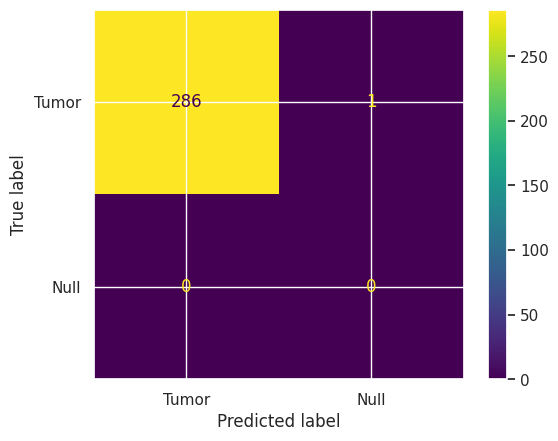

In [81]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os


def generate_confusion_matrix(df):
    y_true = df['y_true'].values
    y_pred = df['y_pred'].values
    return confusion_matrix(y_true, y_pred)

predictions = pd.read_json('runs/detect/val5/predictions.json')

source = '/content/drive/MyDrive/CsiLab-BrainTumor-Detection-3-allinone/data/labels'

y_true_list = []
y_pred_list = predictions['category_id'].to_list()

for filename in os.listdir(source):
    labels = np.loadtxt(os.path.join(f"{source}", filename))
    y_true_list.append(int(labels[0]))

dif = len(y_true_list) -len(y_pred_list)


for i in range(dif):
    y_pred_list.append(1)


df = pd.DataFrame({"y_true":y_true_list,"y_pred":y_pred_list})

print(df)
print(generate_confusion_matrix(df))
disp = ConfusionMatrixDisplay(generate_confusion_matrix(df), display_labels=['Tumor','Null'])
disp.plot()
disp.figure_.savefig(f"{path_model}/brute_confusion_matrix.png")
